In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_poisson import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

In [2]:
kernel_list = [gram_Matrix, k_uu, k_uf, k_fu, k_ff]
hyperparameters = ["l_x", "sigma_f"]
model = PhysicsInformedGP_regressor(kernel_list,timedependence=True, params = hyperparameters)
model.set_name_kernel("poisson")
n_training_points, noise_sq = 20, [1e-8,1e-8]
model.set_training_data("poisson_data.csv",n_training_points, noise_sq)
model.set_validation_data(1000)
#model.plot_raw_data()

 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /home/tobias/anaconda3/envs/bac_arbeit/lib/python3.10/site-packages/scipy/stats/_qmc.py:804: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


In [12]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-1.3,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((2))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lx
    theta_initial[1] = rng.uniform(0, 1, 1)               #sigma_f              
    return theta_initial
n_restarts = 400
n_threads = 13
opt_params_dict = {'theta_initial': get_initial_values,   #needed for all optimization methods
                    'bounds': ((1e-2, None), (1e-5, None)), #needed for TNC and L-BFGS-B
                    'gtol': 1e-6}
model.train("Nelder-Mead",n_restarts, n_threads,opt_params_dict)
#model.train("TNC",n_restarts, n_threads,opt_params_dict)

100%|██████████| 400/400 [00:20<00:00, 19.66it/s]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -8.438056945800781
             x: [ 4.504e-01  2.958e-01]
           nit: 41
          nfev: 108
 final_simplex: (array([[ 4.504e-01,  2.958e-01],
                       [ 4.504e-01,  2.958e-01],
                       [ 4.504e-01,  2.958e-01]]), array([-8.438e+00, -8.438e+00, -8.438e+00]))


In [4]:
theta = np.array([4.479e-01,  2.881e-01]) #-8.393392562866211
model.set_params(theta)

In [13]:
n_test_points = 100
x_star, t_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.reshape(-1, 1), t_star.reshape(-1, 1)))
model.predict_model(X_star)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-----------------------------------------------
GP with kernel: 
Training data: (20, 2)
Training targets: (40, 1)
Hyperparameters: {'l_x': 0.4504489717368544, 'sigma_f': 0.29578435013294435}
Log marginal likelihood: -8.438056945800781
Mean squared error: {'u': 6.591298529201595e-07, 'f': 0.004026004113256931}
Relative l2 error: {'u': 0.008124545838035081, 'f': 0.01282295963677853}
-----------------------------------------------



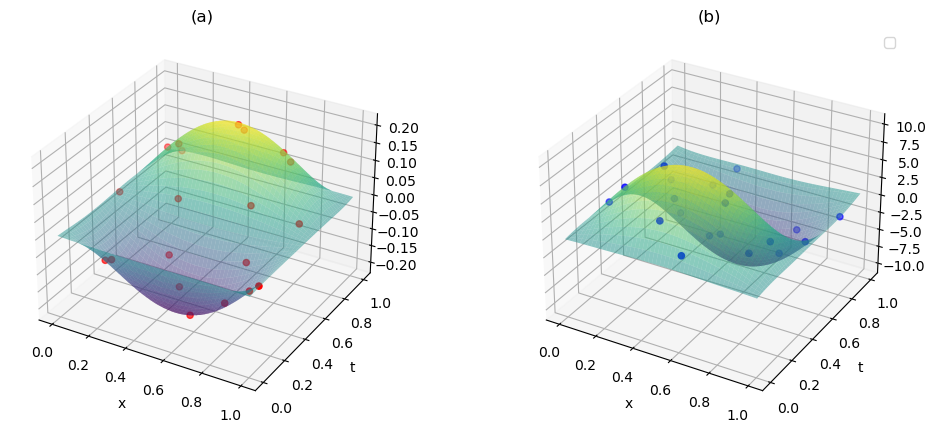

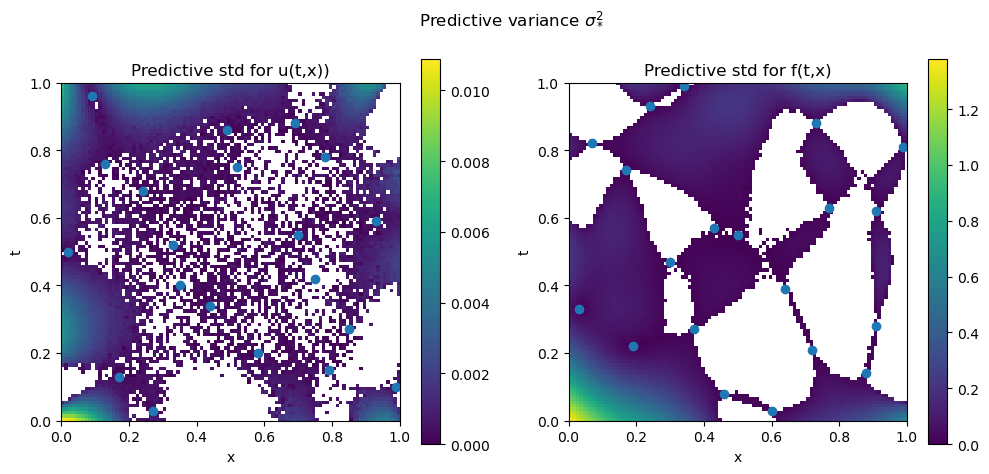

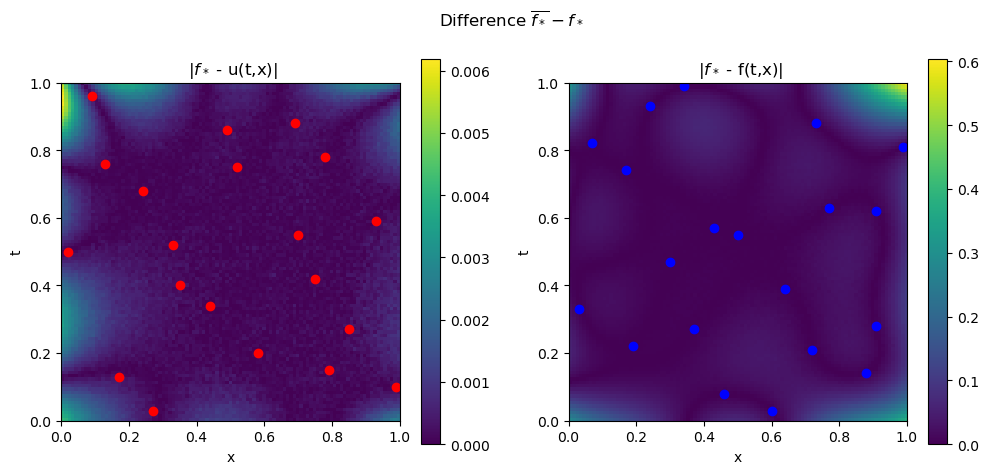

In [14]:
model.plot_prediction(X_star, "","predictive_mean.png")
model.error()
print(model)
model.plot_variance(X_star, "Predictive variance $\\sigma_*^2$", "predictive_variance.png")
model.plot_difference( "Difference $\\overline{ f_*} - f_*$", "difference.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE_u:  9.861717757980929e-05
MSE_f:  0.13008137091922278
relative error u:  0.0989922529843838
relative error f:  0.07285492611339309


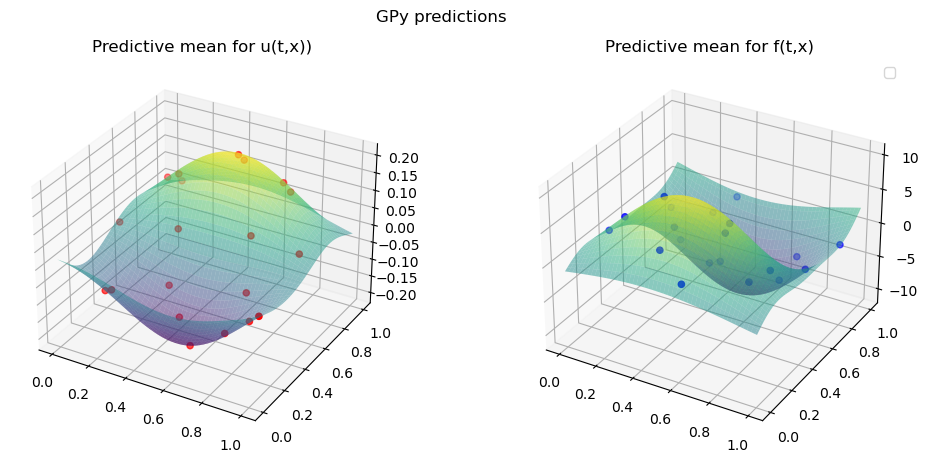

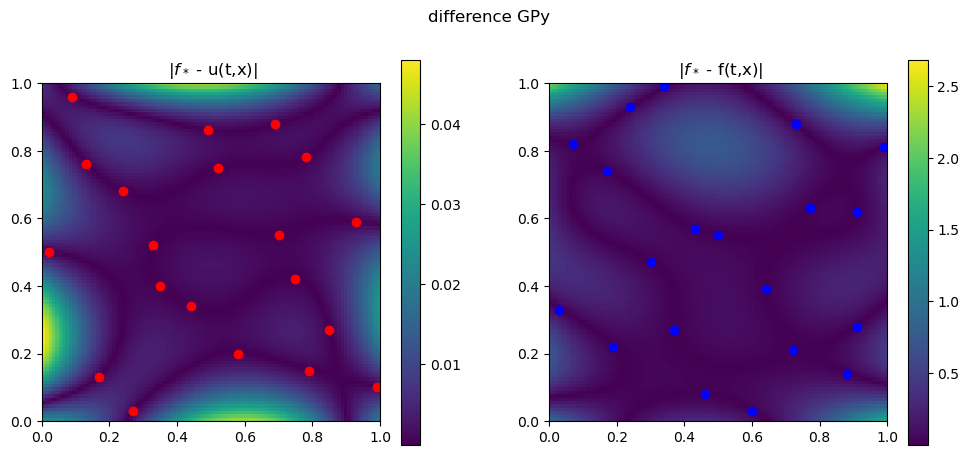

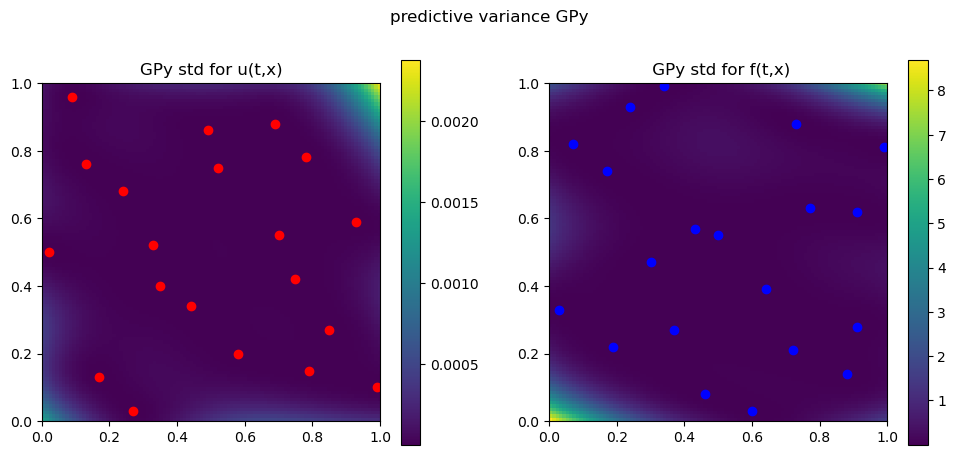

In [7]:
model.use_GPy(X_star,"gpy")
model.plot_difference_GPy("difference GPy ", "GPy_difference.png")
model.plot_variance_GPy("predictive variance GPy ", "GPy_variance.png")

 /home/tobias/code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:1129: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:1138: RuntimeWarning:invalid value encountered in sqrt


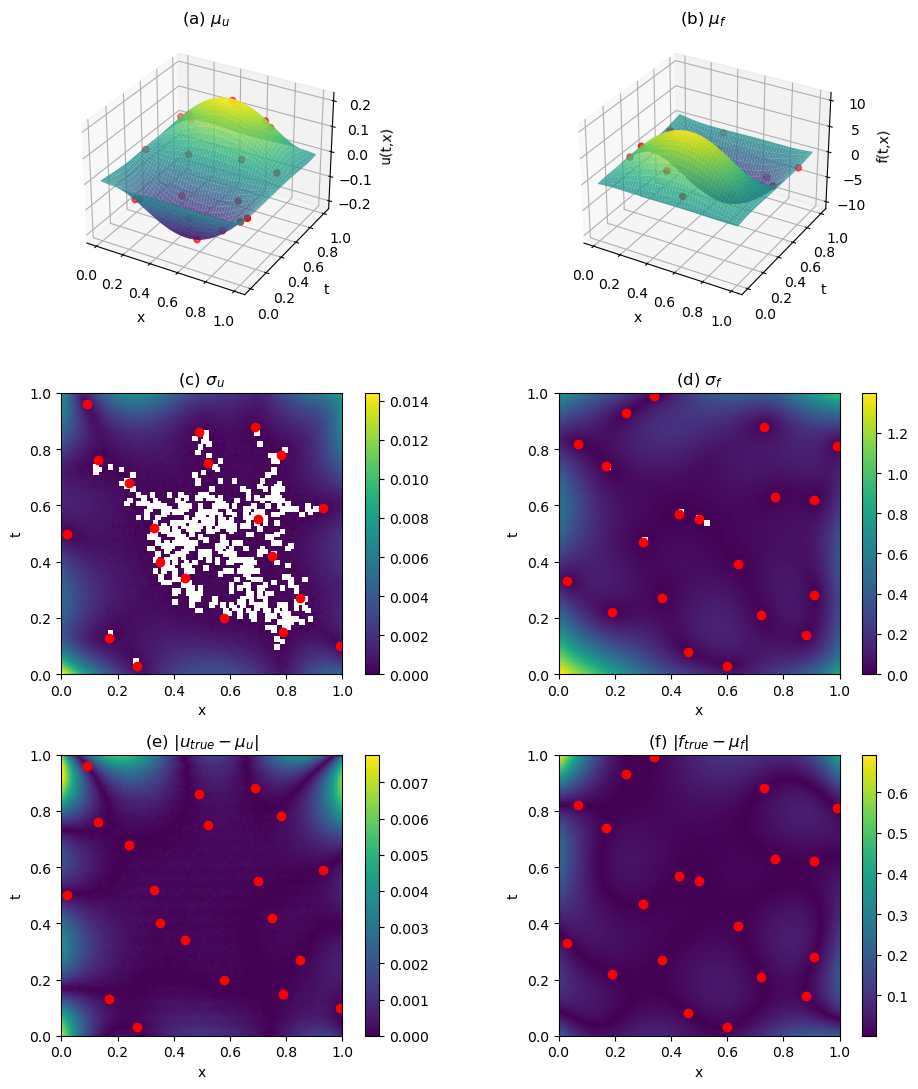

In [8]:
model.set_axis_labels("x","t")
model.plot_merged_2d_plots(X_star,"merged_2d_plots.png",figsize=(10,11))


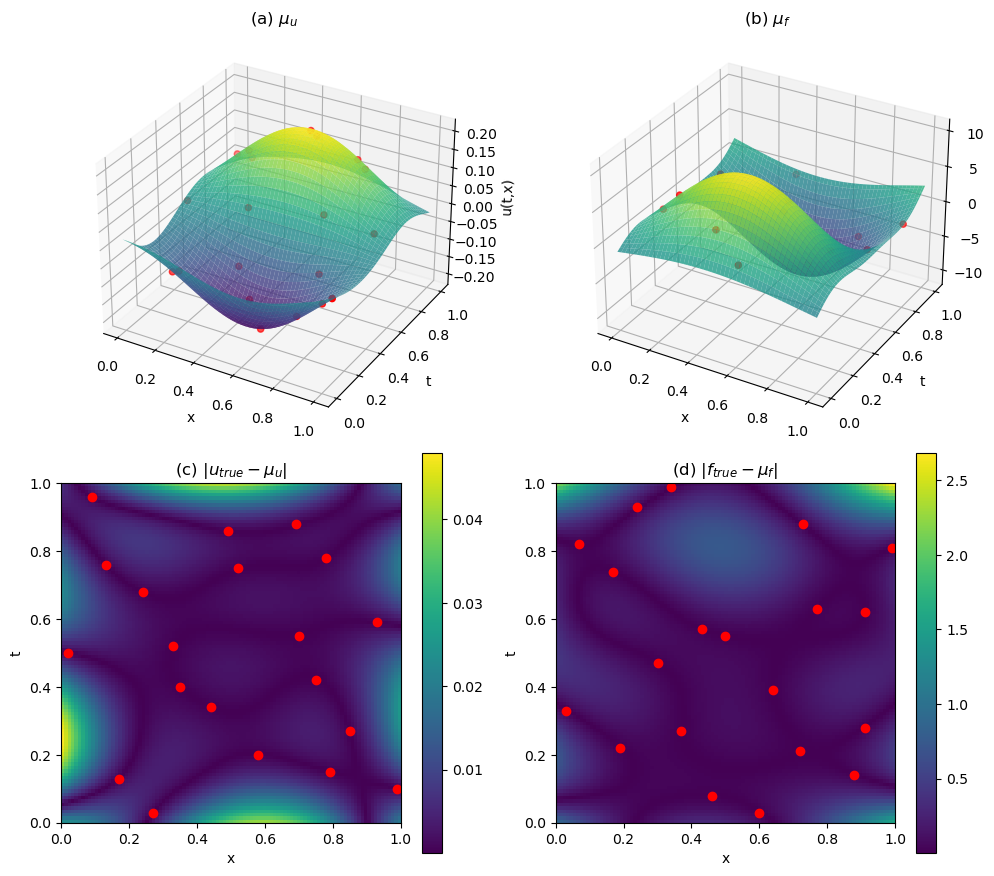

In [9]:
model.plot_GPYmeandiff(X_star,"GPy_mean_diff.png",figsize=(10,9))